# Tarea 14 - Sebastián Negrete Aragón - Física Computacional
# Semestre 2017-2

In [1]:
using PyPlot

## Códigos a utilizar en este notebook

### Runge Kutta Orden 4

In [2]:
#Donde comente es donde radican las variaciones que permitiran realizar de una manera más simple el manejo de varias condiciones iniciales
function RungeKutta4(f,listat,x0)
    longitud=length(listat)
    x=x0
    l=(listat[2]-listat[1])/2
    listax=[] #Solo declaro a listax como un arreglo vacío
    push!(listax,x) #Aplico push! para agregar un valor a la listax el valor x0 que es la condición inicial
    for i in 2:length(listat) #El Ciclo for ahora corre de i=2 hasta que haya usado todos los valores de la listat
        t=listat[i] #Para usar el elemento t correspondiente a la iteración
        k1=f(x,t) #Encontramos k1 ahora usando x,t en vez de explicitamente indicar los elementos de una lista
        k2=f(x+l*k1,t+l)
        k3=f(x+l*k2,t+l)
        k4=f(x+2l*k3,t+2l)
        x=x+(l/3)*(k1+2k2+2k3+k4) #Aplicamos el método de Runge-Kutta
        push!(listax,x) #Salvo el valor de x en listax
    end
    return listax #Regreso el arreglo
end

RungeKutta4 (generic function with 1 method)

### Simplificación de la función map "`ent`"

In [3]:
#Función que simplifica a `map`
function ent(lista,entrada)
    listent=map(x->x[entrada],lista)
    return listent
end

ent (generic function with 1 method)

## Ejercicio 1

Se nos pide Resolver con Runge-Kutta orden 4 el sistema:
\begin{align*}
\dot x &= y-y^3\\
\dot y &= -x -y^2
\end{align*}
__Observaciones__
* Graficar muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
* Calcular el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluarlo en $\vec 0$, el cual es un punto fijo. Calcular $\Delta$ y $\tau$ e indicar que tipo de punto fijo es el $\vec 0$.

Consideremos entonces $\mathbf{x}(t)=(x(t),y(t))$ y $\boldsymbol{F}(\mathbf{x})=(y-y^{3},-x-y^{2})$ de tal manera que $\boldsymbol{F}$ será lo que resolvamos con Runge Kutta O-4.

In [4]:
#Función que representa tal cual a la F propuesta al inicio del ejercicio
F(x,t)=[x[2]-x[2].^3,-x[1]-x[2].^2]

F (generic function with 1 method)

In [5]:
#Evaluaremos valores en el intervalo [0,20] para t con un incremeto de 0.01
listat=0:0.01:20

0.0:0.01:20.0

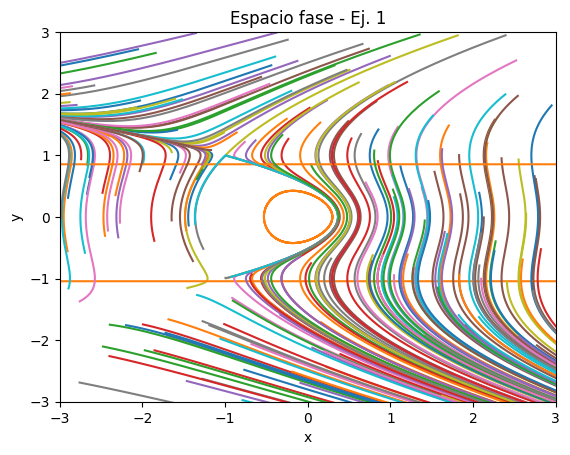

In [6]:
for i in 1:200 #200 iteraciones -> 200 soluciones dadas 200 condiciones iniciales x0,y0
    ci_x_1=3*(2*rand(1)-1) #Condición inicial para x
    ci_y_1=3*(2*rand(1)-1) #Condición inicial para y
    vs_1=RungeKutta4(F,listat,[ci_x_1,ci_y_1])
    lista_x_1=ent(vs_1,1) #Primeras entradas de vs
    lista_y_1=ent(vs_1,2) #Segundas entradas de vs
    plot(lista_x_1,lista_y_1)
    title("Espacio fase - Ej. 1")
    xlim([-3,3]) #Límite en x
    ylim([-3,3]) #Límite en y
    xlabel("x")
    ylabel("y")
end

Recordamos que el Jacobiano de una función $\boldsymbol{F}:\mathrm{R}^2\rightarrow\mathrm{R}^2$, $\boldsymbol{F}(x,y)=\left(F_1(x,y),F_2(x,y)\right)$ es dado por:

$$J_{\boldsymbol{F}}(\mathbf{x})=\left(\begin{array}{cc}\dfrac{\partial F_{1}}{\partial x} & \dfrac{\partial F_{1}}{\partial y}\\\dfrac{\partial F_{2}}{\partial x} & \dfrac{\partial F_{2}}{\partial y}\end{array}\right)$$

En nuestro caso: $\boldsymbol{F}(\mathbf{x})=\boldsymbol{F}(x,y)=(y-y^{3},-x-y^{2})$ por lo que tendríamos que el Jacobiano sería:

$$J_{\boldsymbol{F}}(x,y)=\left(\begin{array}{cc}0 & 1-3y^{2}\\-1 & -2y\end{array}\right)$$

Entonces al evaluar en $\mathbf{x}=(x,y)=(0,0)$ se tiene:

$$J_{\boldsymbol{F}}(0,0)=\left(\begin{array}{cc}0 & 1\\-1 & 0\end{array}\right)$$

De esto $\tau=\mathrm{tr}(J_{\boldsymbol{F}}(0,0))=0$ y $\Delta=\mathrm{det}(J_{\boldsymbol{F}}(0,0))=1$.

Por lo visto en clase con el diagrama que relaciona la traza y el determinante del Jacobiano concluimos que dicho punto es un centro. Esto se comprueba con la iteración realizada.

## Ejercicio 2

Ahora se pide resolver usando Runge-Kutta orden 4 el oscilador de van der Pol:
$${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
__Observaciones__
* Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observamos alguna estructura en particular?
* Usen $\mu=0.5$
* Graficar varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.

Notemos que podemos llevar el sistema propuesto a uno de tipo:

$$\frac{d\mathbf{x}}{dt}=\boldsymbol{P}(\mathbf{x}),$$

Haciendo:
$$u(t)=\dot{x}(t)$$
Donde
$$\mathbf{x}(t)=(x(t),u(t))$$
$$\boldsymbol{P}(\mathbf{x})=(u,\mu(1-x^{2})u-x)$$

In [7]:
#Función P propuesta anteriormente con la condición mu=0.5
P(x,t)=[x[2],0.5*(1-x[1].^2).*x[2]-x[1]]

P (generic function with 1 method)

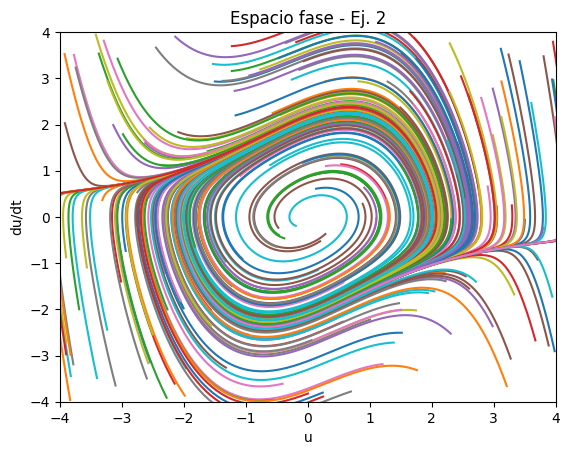

In [8]:
#Usamos listat del ejercicio anterior para valores de t
for i in 1:200 #200 iteraciones -> 200 soluciones dadas 200 condiciones iniciales x0,y0
    ci_x_2=4*(2*rand(1)-1) #Condición inicial para x
    ci_y_2=4*(2*rand(1)-1) #Condición inicial para y
    vs_2=RungeKutta4(P,listat,[ci_x_2,ci_y_2]);
    lista_x_2=ent(vs_2,1) #Primeras entradas de vs
    lista_y_2=ent(vs_2,2) #Segundas entradas de vs
    plot(lista_x_2,lista_y_2)
    title("Espacio fase - Ej. 2")
    xlim([-4,4]) #Límite en x
    ylim([-4,4]) #Límite en y
    xlabel("u")
    ylabel("du/dt")
end

Notamos que $(0,0)$ parece ser un punto fijo. Si evaluamos dicho punto en el Jacobiano para la función $P$ podremos decir que tipo es:

$$J_{\boldsymbol{P}}(\mathbf{x})=\left(\begin{array}{cc}0 & 1\\-2\mu xu-1 & \mu(1-x^{2})\end{array}\right)$$

Entonces:

$$J_{\boldsymbol{P}}(0,0)=\left(\begin{array}{cc}0 & 1\\-1 & \mu\end{array}\right)$$

De aquí $\tau=\mu>0$ y $\Delta=1>0$ y como $\tau^{2}-4\Delta=\mu^{2}-4$ para $\mu=0.5$ tendríamos que $\tau^{2}-4\Delta<0$ lo que nos indica que es una espiral inestable.

Apreciamos una región de tipo rectangular con bordes redondos centrada en $(0,0)$. Para las soluciones que comienzan dentro de dicha región éstas se alejarán hacia el contorno descrito anteriromente mientras que soluciones que empiezan fuera se acercan. En Ecuaciones Diferenciales I vimos que la frontera que  nos da la región es un ciclo límite.

Ahora graficamos en el espacio $(x(t),t)$

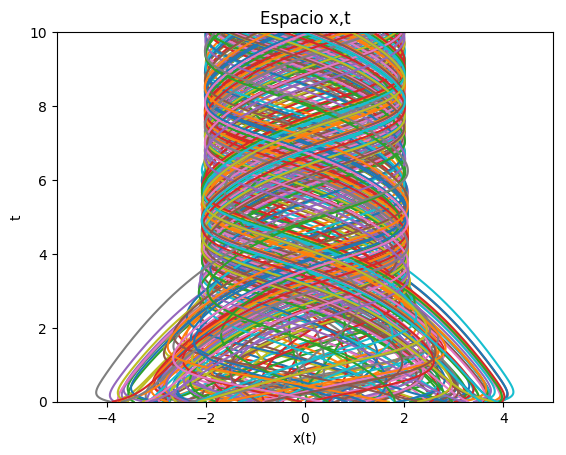

In [9]:
#Usamos listat del ejercicio anterior para valores de t
for i in 1:200
    ci_x_3=4*(2*rand(1)-1) #Condición inicial para x
    ci_y_3=4*(2*rand(1)-1) #Condición inicial para y
    vs_3=RungeKutta4(P,listat,[ci_x_3,ci_y_3]);
    lista_x_3=ent(vs_3,1) #Primeras entradas de vs
    plot(lista_x_3,listat)
    title("Espacio x,t")
    xlim([-5,5]) #Límite en x
    ylim([0,10]) #Límite en t
    xlabel("x(t)")
    ylabel("t")
end

Ahora graficamos en el espacio $(y(t)=u(t),t)$

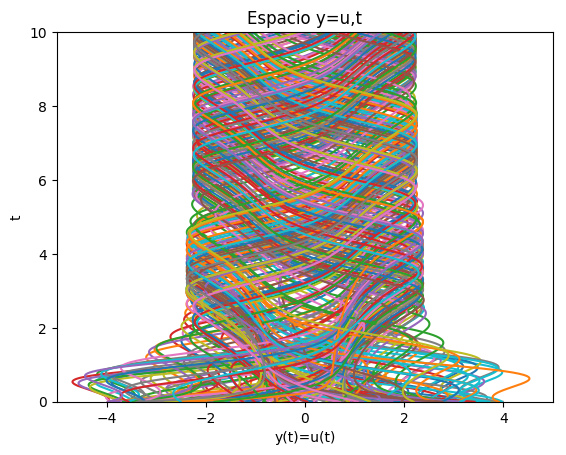

In [10]:
#Usamos listat del ejercicio anterior para valores de t
for i in 1:200
    ci_x_4=4*(2*rand(1)-1) #Condición inicial para x
    ci_y_4=4*(2*rand(1)-1) #Condición inicial para y
    vs_4=RungeKutta4(P,listat,[ci_x_4,ci_y_4]);
    lista_y_4=ent(vs_4,2) #Segundas entradas de vs
    plot(lista_y_4,listat)
    title("Espacio y=u,t")
    xlim([-5,5]) #Límite en y=u
    ylim([0,10]) #Límite en t
    xlabel("y(t)=u(t)")
    ylabel("t")
end

FIN